In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as pl
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go
sns.set_style('whitegrid')
plt.style.use('fivethirtyeight')
%matplotlib inline
from pandas_datareader.data import DataReader
from datetime import datetime

<IPython.core.display.Javascript object>

In [2]:
hist_quotes_df=pd.read_csv('HistoricalQuotes.csv')

In [3]:
hist_quotes_df.head()

,Date,Close/Last,Volume,Open,High,Low
0,02/28/2020,$273.36,106721200,$257.26,$278.41,$256.37
1,02/27/2020,$273.52,80151380,$281.1,$286,$272.96
2,02/26/2020,$292.65,49678430,$286.53,$297.88,$286.5
3,02/25/2020,$288.08,57668360,$300.95,$302.53,$286.13
4,02/24/2020,$298.18,55548830,$297.26,$304.18,$289.23


In [4]:
tech_list=['AAPL','GOOG','MSFT','AMZN']

end=datetime.now()

start=datetime(end.year-1,end.month,end.day)

for stock in tech_list:
    globals()[stock]=DataReader(stock,'yahoo',start,end)

In [5]:
stock

'AMZN'

In [6]:
globals()[stock].head()


,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-11-12,1786.219971,1771.910034,1774.660034,1778.000000,2037600,1778.000000
2019-11-13,1775.000000,1747.319946,1773.390015,1753.109985,2989500,1753.109985
2019-11-14,1766.589966,1749.560059,1751.430054,1754.599976,2264800,1754.599976
2019-11-15,1761.680054,1732.859985,1760.050049,1739.489990,3927600,1739.489990
2019-11-18,1753.699951,1722.709961,1738.300049,1752.530029,2839500,1752.530029


In [7]:
company_list=[AAPL,GOOG,MSFT,AMZN]
company_name=['APPLE','GOOGLE','MICROSOFT','AMAZON']

for company,comp_name in zip(company_list,company_name):
    company['company_name']=comp_name
df=pd.concat(company_list,axis=0)
df.head()

,High,Low,Open,Close,Volume,Adj Close,company_name
Date,,,,,,,
2019-11-12,65.697502,65.230003,65.387497,65.489998,87388800.0,64.401978,APPLE
2019-11-13,66.195000,65.267502,65.282501,66.117500,102734400.0,65.019051,APPLE
2019-11-14,66.220001,65.525002,65.937500,65.660004,89182800.0,64.569160,APPLE
2019-11-15,66.445000,65.752502,65.919998,66.440002,100206400.0,65.336212,APPLE
2019-11-18,66.857498,66.057503,66.449997,66.775002,86703200.0,65.665634,APPLE


In [8]:
AAPL.describe()

,High,Low,Open,Close,Volume,Adj Close
count,254.000000,254.000000,254.000000,254.000000,2.540000e+02,254.000000
mean,89.139390,86.629754,87.864764,87.955777,1.535355e+08,87.300521
std,20.628840,19.833589,20.428060,20.197066,7.296431e+07,20.543198
min,57.125000,53.152500,57.020000,56.092499,2.880380e+07,55.291519
25%,71.589373,69.831875,70.560627,71.077497,1.057441e+08,69.938141
50%,80.860001,79.439999,80.161251,80.041248,1.360484e+08,79.265083
75%,112.080000,108.629374,110.230001,110.075626,1.842475e+08,109.836607
max,137.979996,130.529999,137.589996,134.179993,4.268848e+08,133.948898


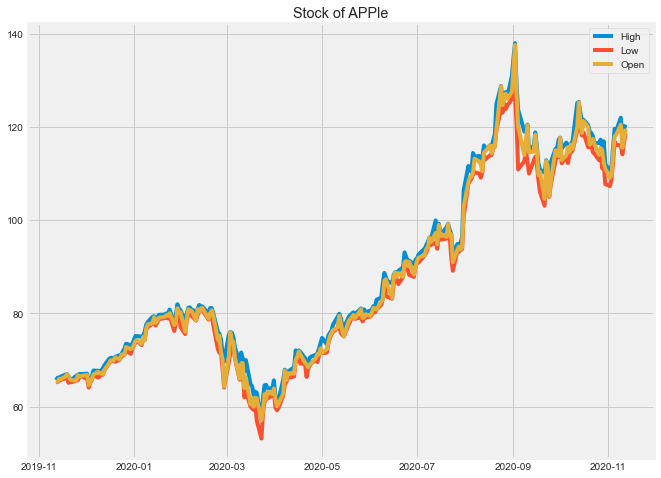

In [9]:
pl.figure(figsize=(10,8))
pl.title('Stock of APPle')
pl.plot(AAPL['High'],label='High')
pl.plot(AAPL['Low'],label='Low')
pl.plot(AAPL['Open'],label='Open')
pl.legend()

In [10]:
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 254 entries, 2019-11-12 to 2020-11-12
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   High          254 non-null    float64
 1   Low           254 non-null    float64
 2   Open          254 non-null    float64
 3   Close         254 non-null    float64
 4   Volume        254 non-null    float64
 5   Adj Close     254 non-null    float64
 6   company_name  254 non-null    object 
dtypes: float64(6), object(1)
memory usage: 15.9+ KB


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

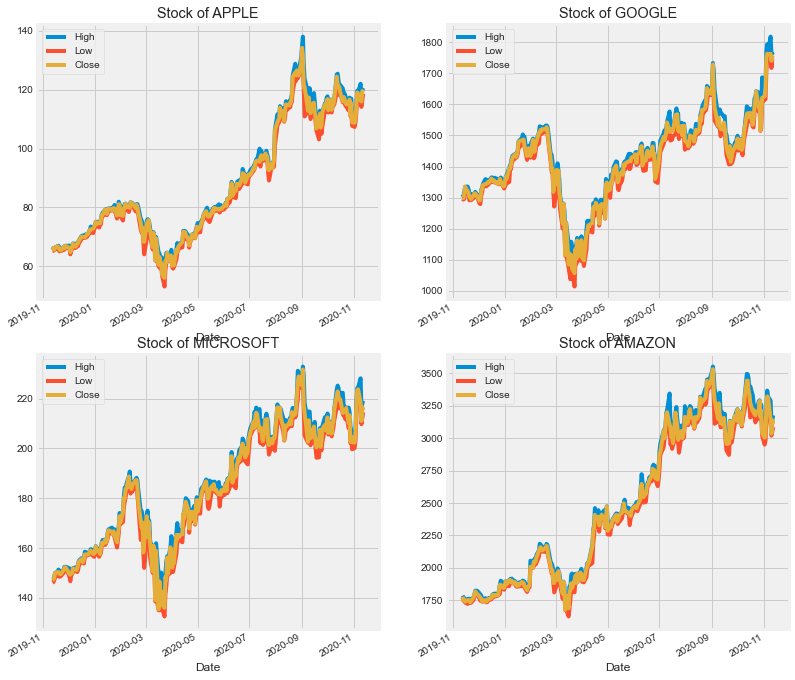

In [11]:
plt.figure(figsize=(12, 8))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i,j  in enumerate(df['company_name'].unique(),1):
#     pl.figure(figsize=(10,8))
    pl.subplot(2,2,i)
    pl.title('Stock of {}'.format(j))
    df[df['company_name']==j]['High'].plot()
    df[df['company_name']==j]['Low'].plot()
    df[df['company_name']==j]['Close'].plot()

    pl.legend()
pl.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

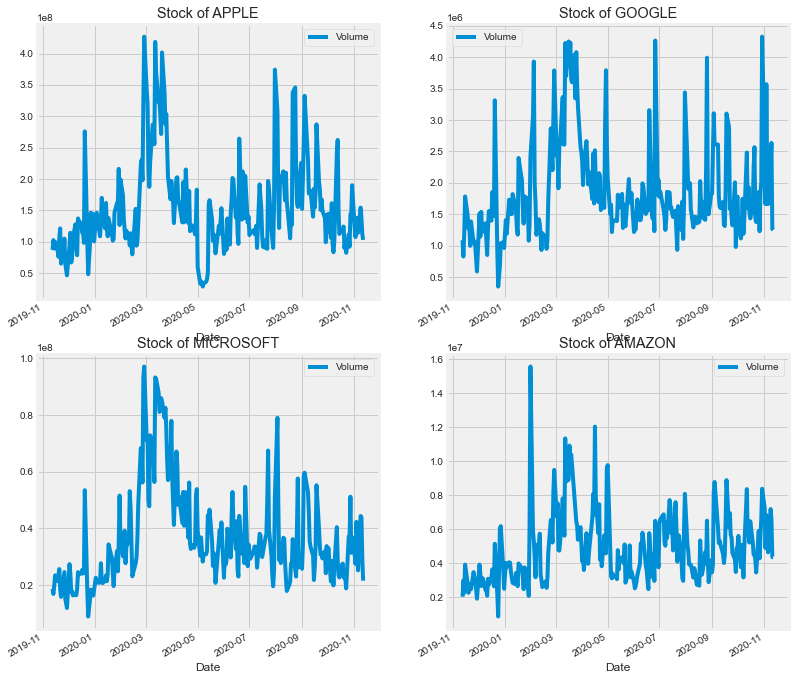

In [12]:
plt.figure(figsize=(12, 8))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i,j  in enumerate(df['company_name'].unique(),1):
#     pl.figure(figsize=(10,8))
    pl.subplot(2,2,i)
    pl.title('Stock of {}'.format(j))
    df[df['company_name']==j]['Volume'].plot()


    pl.legend()
pl.show()

In [13]:
ma_day=[10,20,50]
for ma in ma_day:
    for company in company_list:
        column_name=f"MA for {ma}days"
        company[column_name]=company['Adj Close'].rolling(ma).mean()

In [14]:
AAPL.head()

,High,Low,Open,Close,Volume,Adj Close,company_name,MA for 10days,MA for 20days,MA for 50days
Date,,,,,,,,,,
2019-11-12,65.697502,65.230003,65.387497,65.489998,87388800.0,64.401978,APPLE,NaN,NaN,NaN
2019-11-13,66.195000,65.267502,65.282501,66.117500,102734400.0,65.019051,APPLE,NaN,NaN,NaN
2019-11-14,66.220001,65.525002,65.937500,65.660004,89182800.0,64.569160,APPLE,NaN,NaN,NaN
2019-11-15,66.445000,65.752502,65.919998,66.440002,100206400.0,65.336212,APPLE,NaN,NaN,NaN
2019-11-18,66.857498,66.057503,66.449997,66.775002,86703200.0,65.665634,APPLE,NaN,NaN,NaN


In [15]:
GOOG.columns

Index(['High', 'Low', 'Open', 'Close', 'Volume', 'Adj Close', 'company_name',
       'MA for 10days', 'MA for 20days', 'MA for 50days'],
      dtype='object')

company_name
AMAZON       [[AxesSubplot(0.08,0.670278;0.378261x0.209722)...
APPLE        [[AxesSubplot(0.08,0.670278;0.378261x0.209722)...
GOOGLE       [[AxesSubplot(0.08,0.670278;0.378261x0.209722)...
MICROSOFT    [[AxesSubplot(0.08,0.670278;0.378261x0.209722)...
dtype: object

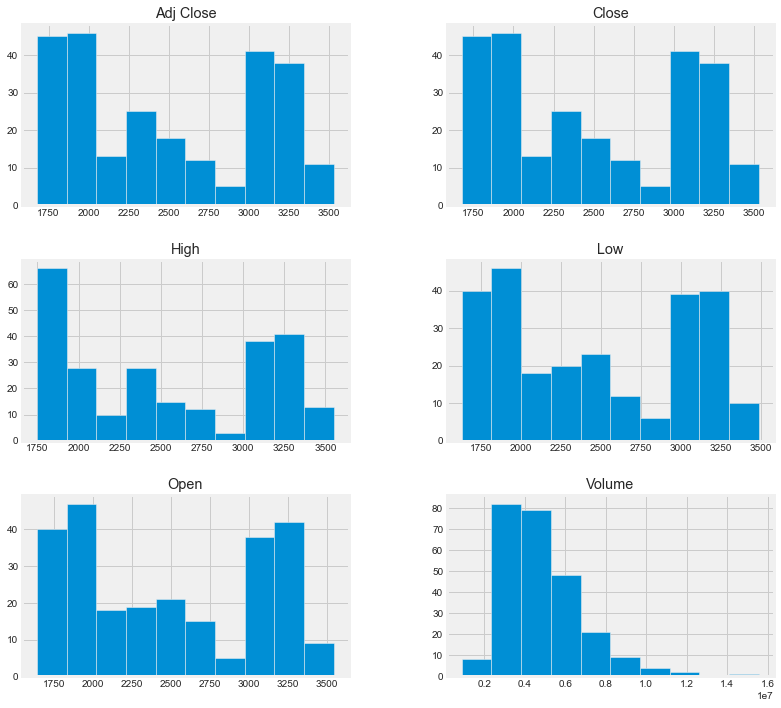

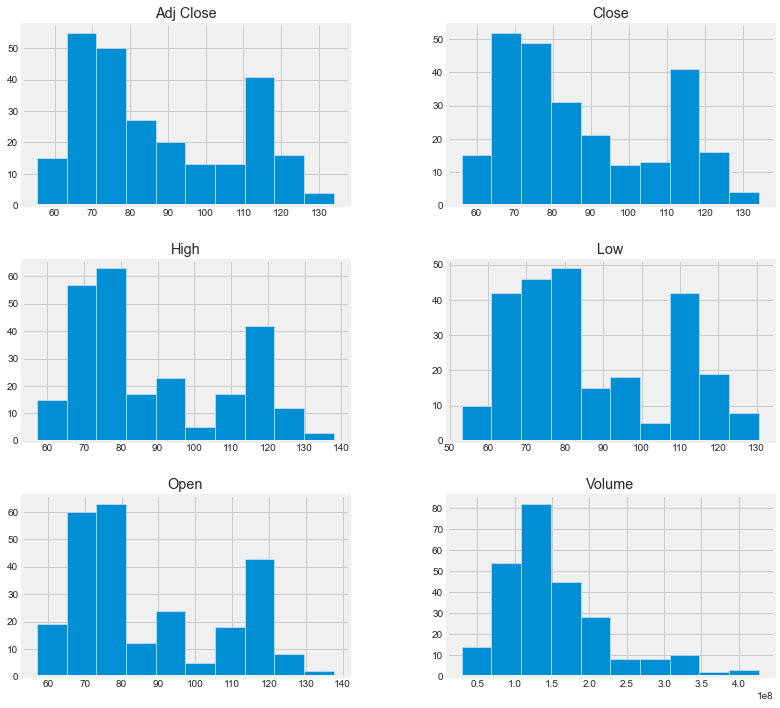

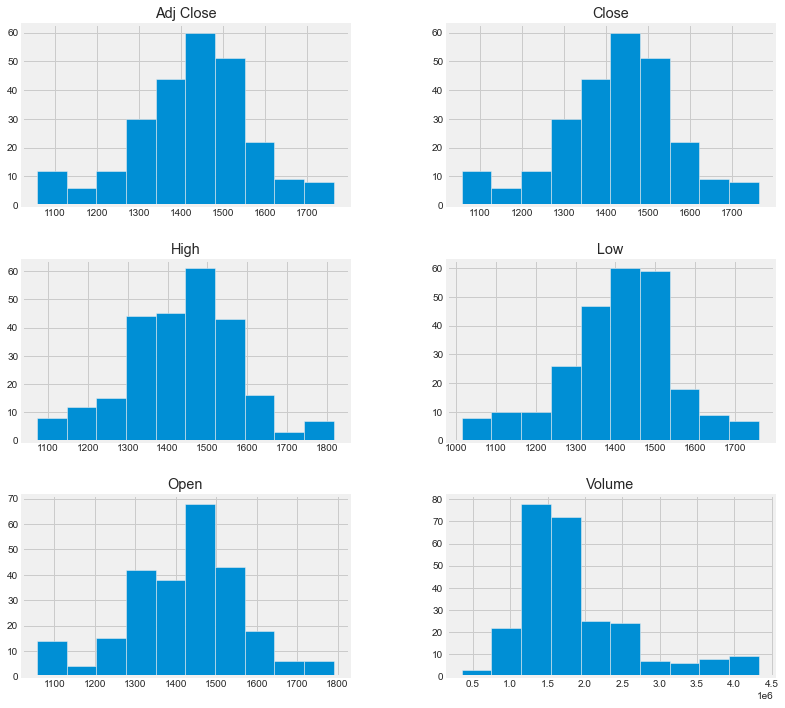

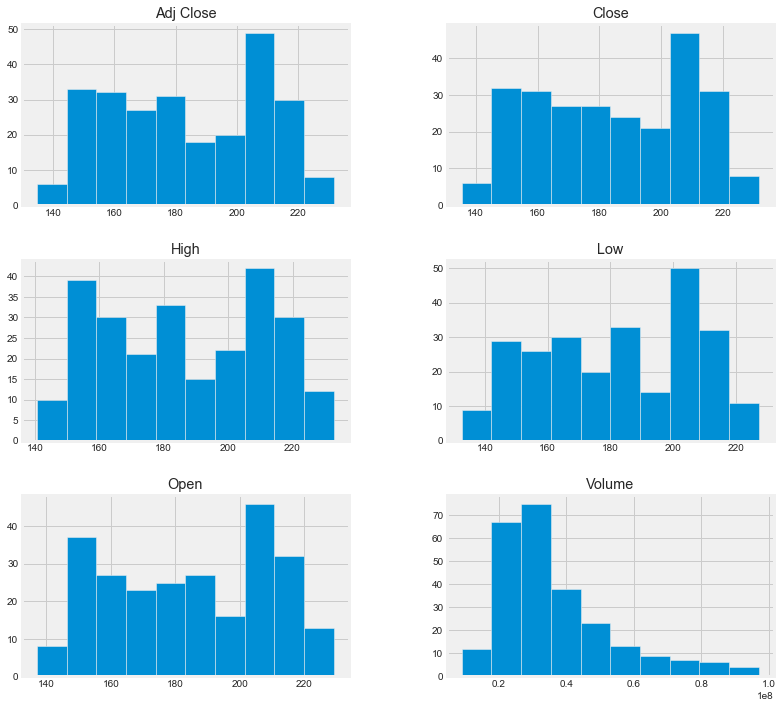

In [16]:
df.groupby('company_name').hist(figsize=(12,12))

<IPython.core.display.Javascript object>

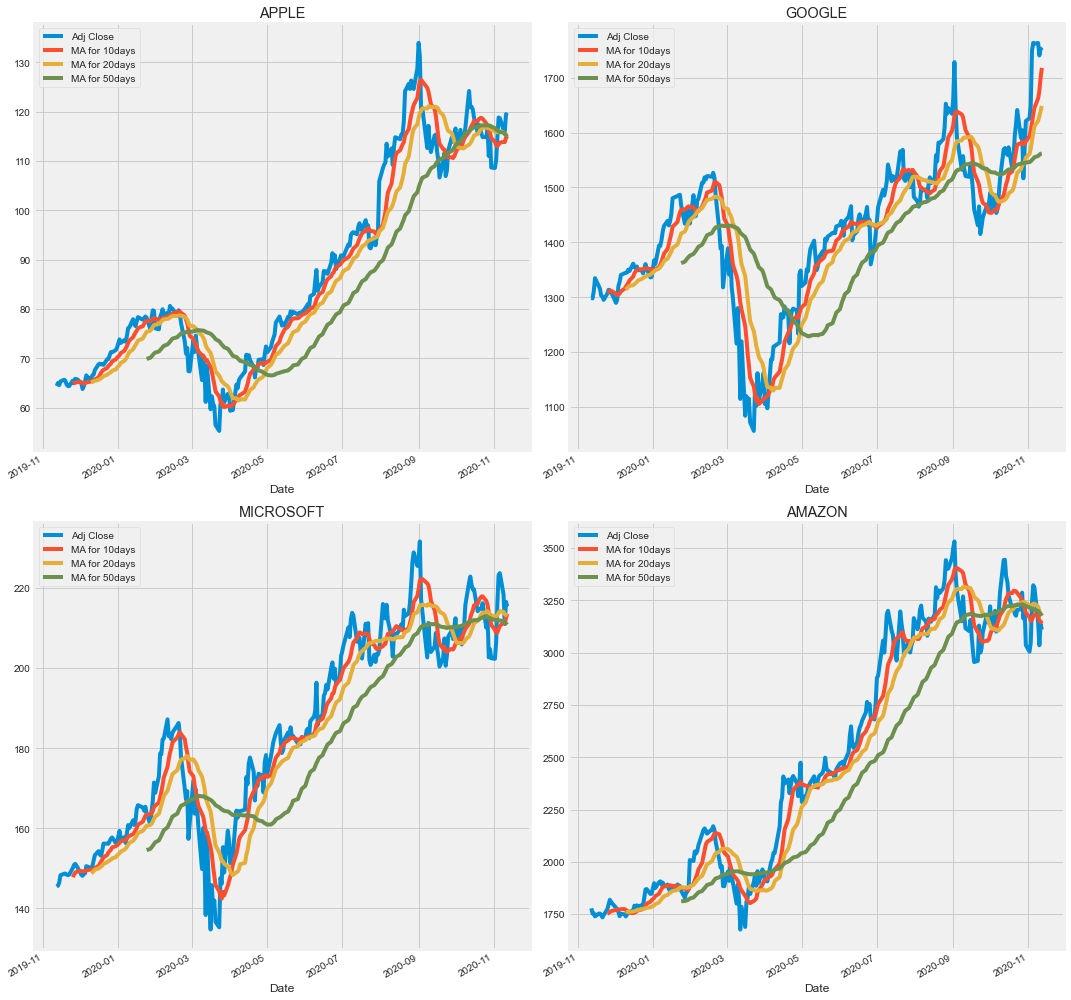

In [17]:
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(14)
fig.set_figwidth(15)

AAPL[['Adj Close', 'MA for 10days', 'MA for 20days', 'MA for 50days']].plot(ax=axes[0,0])
axes[0,0].set_title('APPLE')

GOOG[['Adj Close', 'MA for 10days', 'MA for 20days', 'MA for 50days']].plot(ax=axes[0,1])
axes[0,1].set_title('GOOGLE')

MSFT[['Adj Close', 'MA for 10days', 'MA for 20days', 'MA for 50days']].plot(ax=axes[1,0])
axes[1,0].set_title('MICROSOFT')

AMZN[['Adj Close', 'MA for 10days', 'MA for 20days', 'MA for 50days']].plot(ax=axes[1,1])
axes[1,1].set_title('AMAZON')

fig.tight_layout()

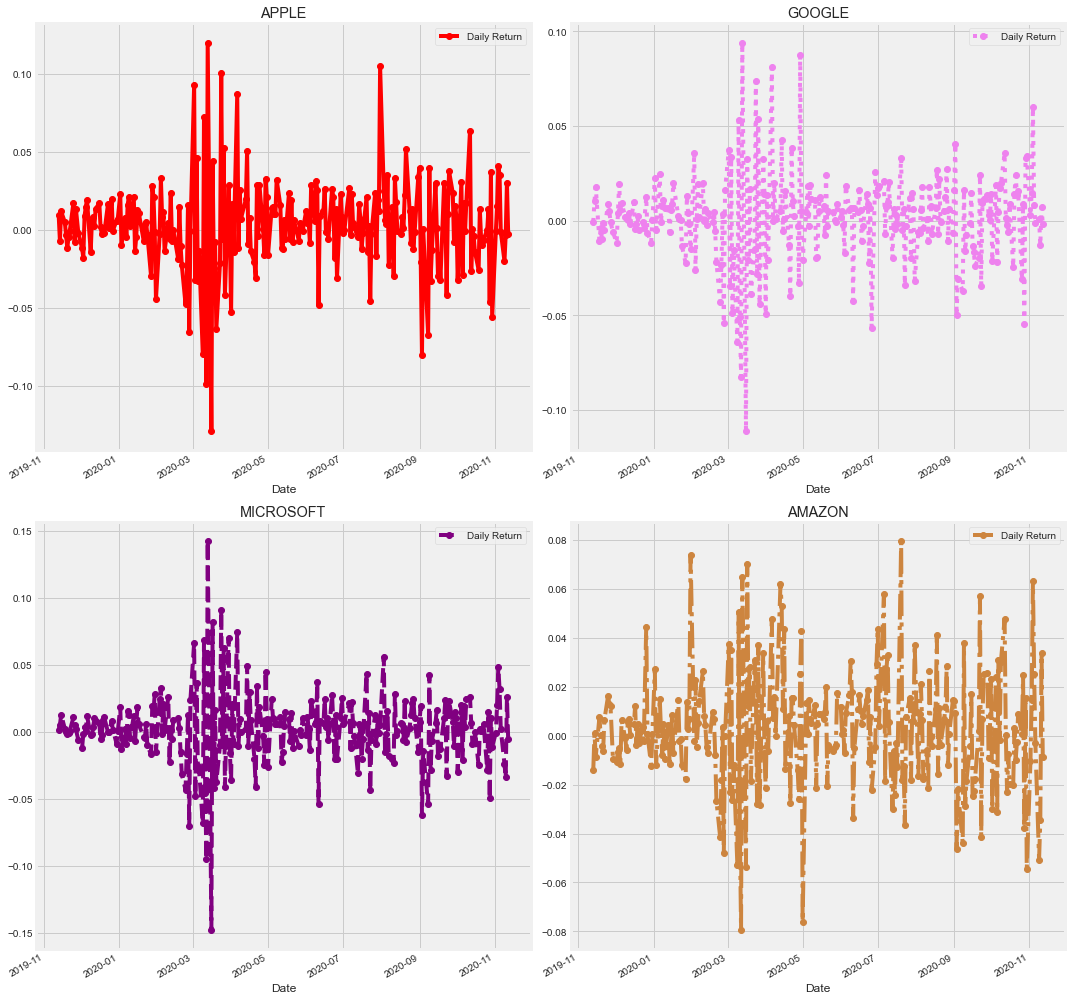

In [18]:
for company in company_list:
    company['Daily Return']=company['Adj Close'].pct_change()
    
    
fig,axes=pl.subplots(2,2)
fig.set_figheight(14)
fig.set_figwidth(15)

AAPL['Daily Return'].plot(ax=axes[0,0], legend=True, linestyle='-', marker='o',color='r')
axes[0,0].set_title('APPLE')

GOOG['Daily Return'].plot(ax=axes[0,1], legend=True, linestyle=':', marker='o',color='violet')
axes[0,1].set_title('GOOGLE')

MSFT['Daily Return'].plot(ax=axes[1,0], legend=True, linestyle='--', marker='o',color='purple')
axes[1,0].set_title('MICROSOFT')

AMZN['Daily Return'].plot(ax=axes[1,1], legend=True, linestyle='-.', marker='o',color='peru')
axes[1,1].set_title('AMAZON')

fig.tight_layout()


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

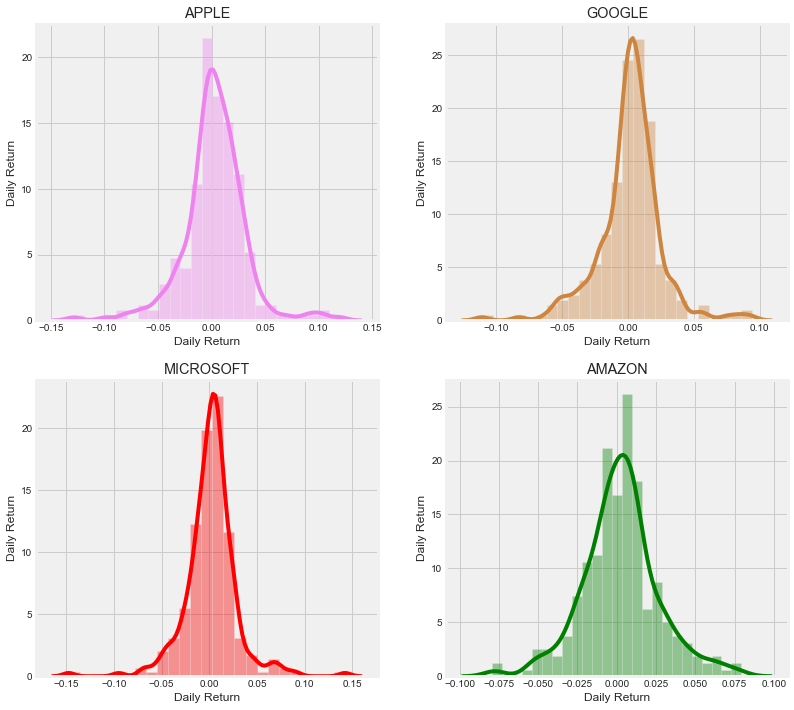

In [19]:
pl.figure(figsize=(12,12))
colr=['black','violet','peru','red','green']
for i,company in enumerate(company_list,1):
    plt.subplot(2,2,i)
    sns.distplot(company['Daily Return'].dropna(),bins=25,color=colr[i])
    pl.ylabel('Daily Return')
    pl.title(company_name[i-1])

In [24]:
closing_df=DataReader(tech_list,'yahoo',start,end)['Adj Close']
closing_df.head()

Symbols,AAPL,GOOG,MSFT,AMZN
Date,,,,
2019-11-12,64.401978,1298.800049,145.414520,1778.000000
2019-11-13,65.019051,1298.000000,145.651825,1753.109985
2019-11-14,64.569160,1311.459961,146.393372,1754.599976
2019-11-15,65.336212,1334.869995,148.281891,1739.489990
2019-11-18,65.665634,1320.699951,148.647720,1752.530029


In [28]:
tech_rets=closing_df.pct_change()

In [29]:
tech_rets.head()

Symbols,AAPL,GOOG,MSFT,AMZN
Date,,,,
2019-11-12,NaN,NaN,NaN,NaN
2019-11-13,0.009582,-0.000616,0.001632,-0.013999
2019-11-14,-0.006919,0.010370,0.005091,0.000850
2019-11-15,0.011880,0.017850,0.012900,-0.008612
2019-11-18,0.005042,-0.010615,0.002467,0.007496


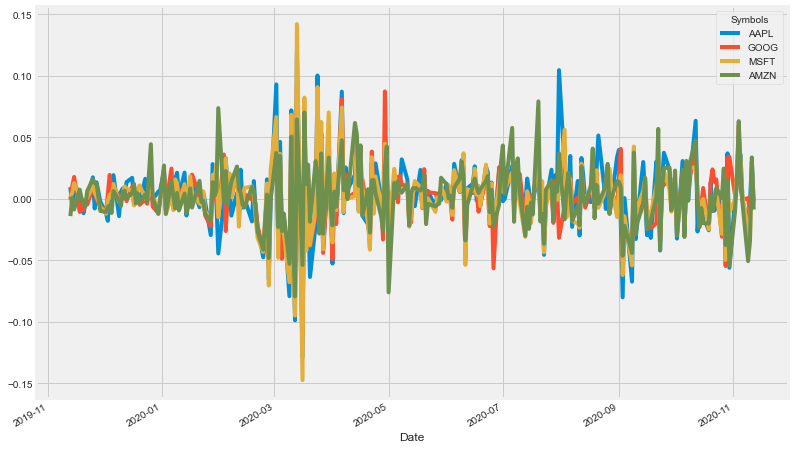

In [33]:
tech_rets.plot(figsize=(12,8))

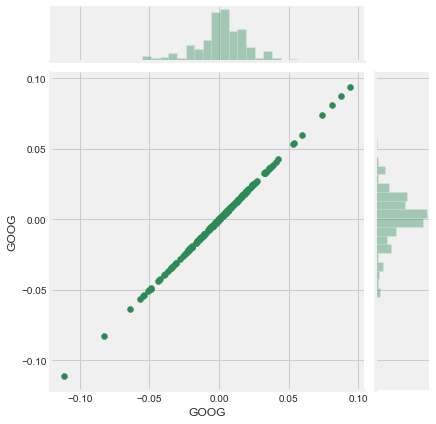

In [34]:
sns.jointplot('GOOG','GOOG',tech_rets,kind='scatter',color='seagreen')

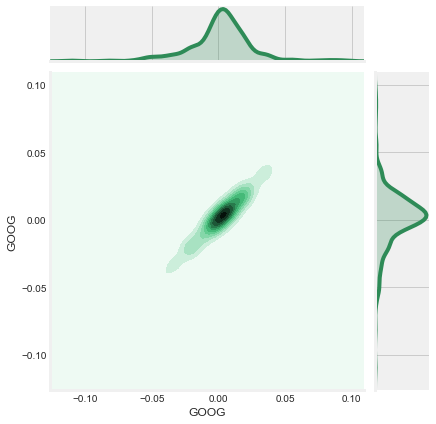

In [35]:
sns.jointplot('GOOG','GOOG',tech_rets,kind='kde',color='seagreen')

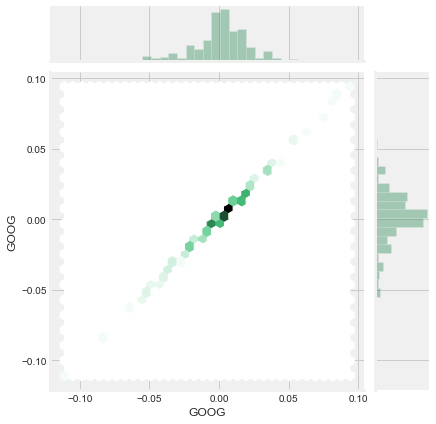

In [36]:
sns.jointplot('GOOG','GOOG',tech_rets,kind='hex',color='seagreen')

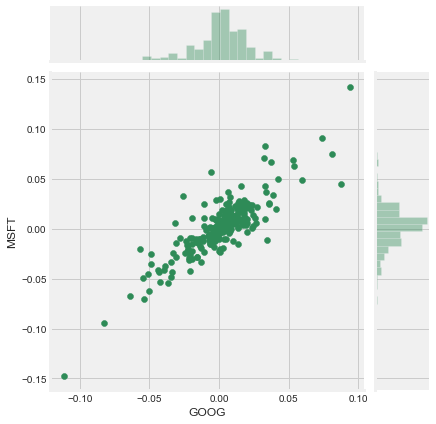

In [39]:
sns.jointplot('GOOG','MSFT',tech_rets,kind='scatter',color='seagreen')

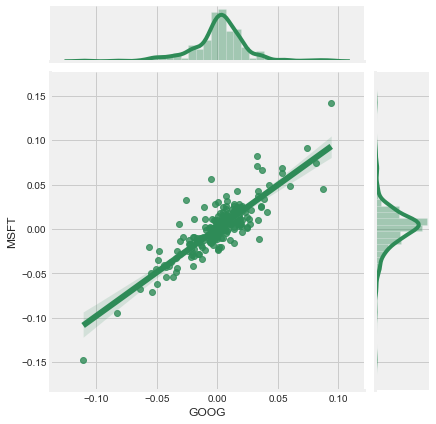

In [43]:
sns.jointplot('GOOG','MSFT',tech_rets,kind='reg',color='seagreen')

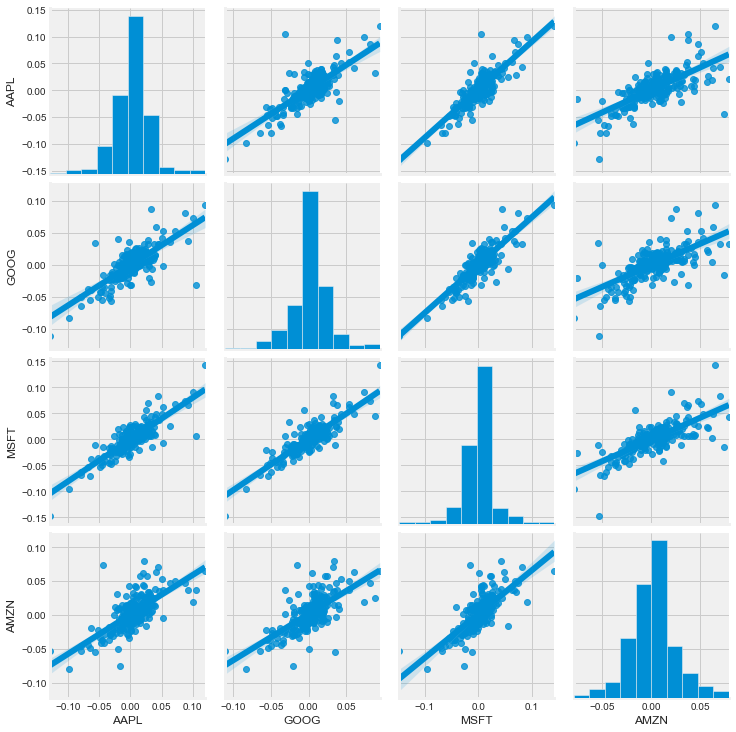

In [44]:
sns.pairplot(tech_rets,kind='reg')

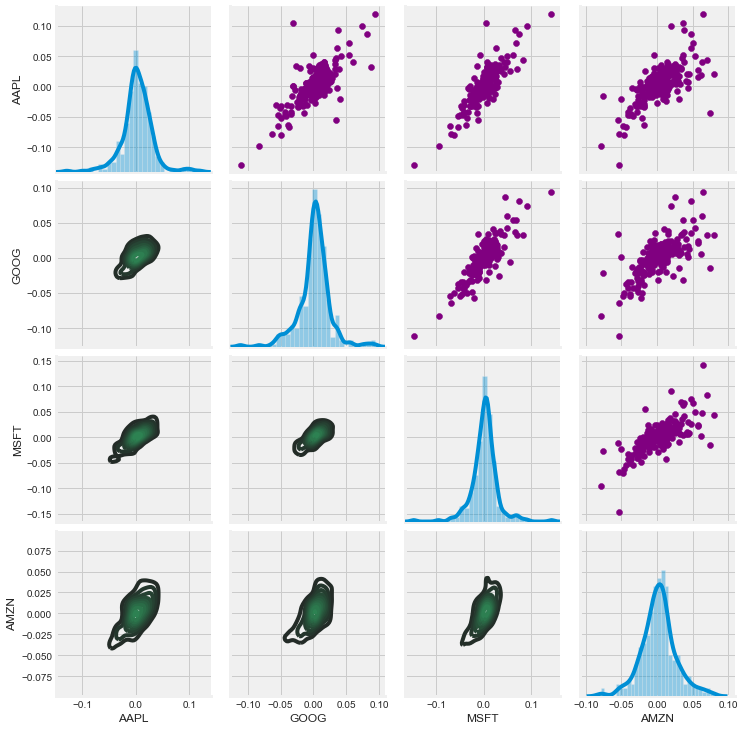

In [48]:
return_fig=sns.PairGrid(tech_rets)
return_fig.map_upper(pl.scatter,color='purple')
return_fig.map_lower(sns.kdeplot,color='seagreen')
return_fig.map_diag(sns.distplot,bins=30)

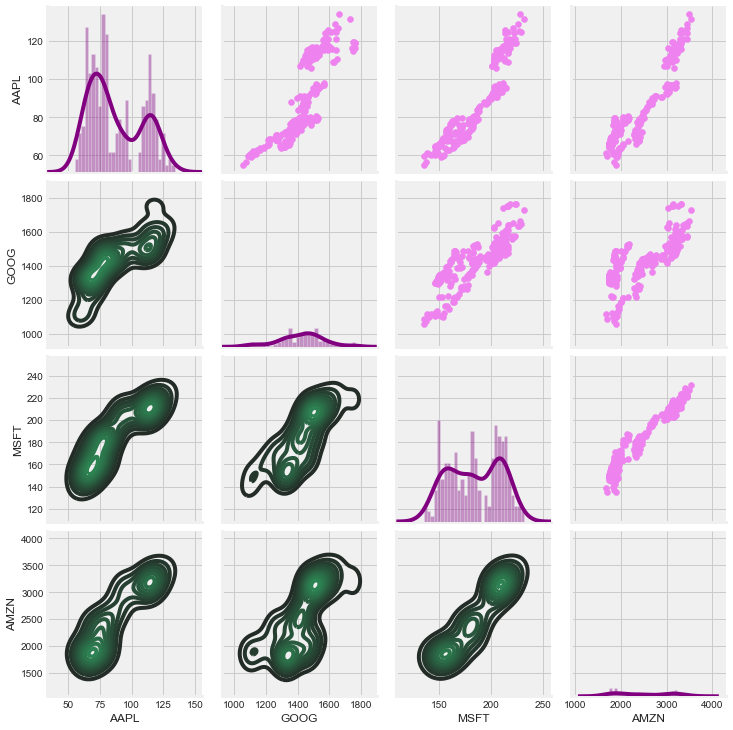

In [51]:
returns_fig=sns.PairGrid(closing_df)

returns_fig.map_upper(pl.scatter,color='violet')
returns_fig.map_lower(sns.kdeplot,color='seagreen')
returns_fig.map_diag(sns.distplot,bins=30,color='purple')


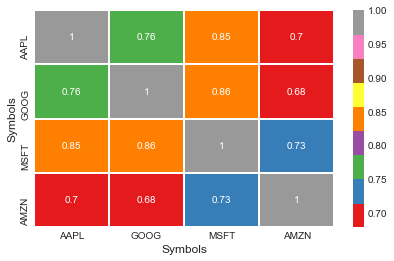

In [65]:
sns.heatmap(tech_rets.corr(), annot=True, cmap='Set1',
            linewidth=1
       )

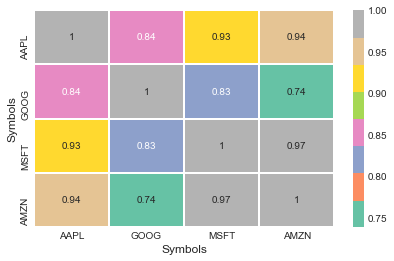

In [57]:
sns.heatmap(closing_df.corr(), annot=True, cmap='Set2',linewidths=1,
           )

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

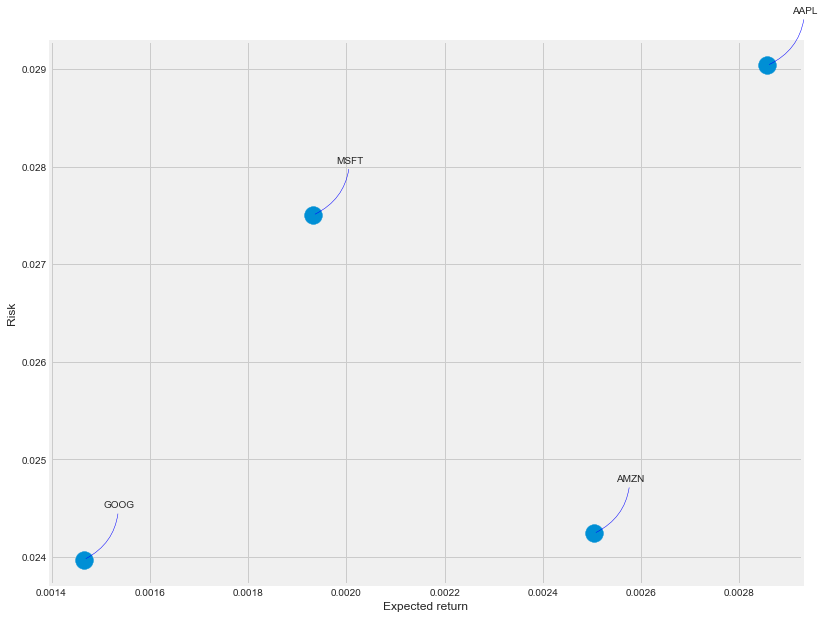

In [87]:
rets=tech_rets.dropna()
area=np.pi*20

pl.figure(figsize=(12,10))
pl.scatter(rets.mean(),rets.std(),s=area*5)
pl.xlabel('Expected return')
pl.ylabel('Risk')

for label,x,y, in zip(rets.columns,rets.mean(),rets.std()):
    plt.annotate(label, xy=(x, y), xytext=(50, 50), textcoords='offset points', ha='right', va='bottom', 
                 arrowprops=dict(arrowstyle='-', color='blue', connectionstyle='arc3,rad=-0.3'))



pl.show()

In [74]:
rets.columns

Index(['AAPL', 'GOOG', 'MSFT', 'AMZN'], dtype='object', name='Symbols')

In [88]:
df=DataReader('AAPL',data_source='yahoo',start='2012-01-01',end=datetime.now())
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,14.732142,14.607142,14.621428,14.686786,302220800.0,12.566676
2012-01-04,14.810000,14.617143,14.642858,14.765715,260022000.0,12.634213
2012-01-05,14.948215,14.738214,14.819643,14.929643,271269600.0,12.774481
2012-01-06,15.098214,14.972143,14.991786,15.085714,318292800.0,12.908023
2012-01-09,15.276786,15.048214,15.196428,15.061786,394024400.0,12.887549


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

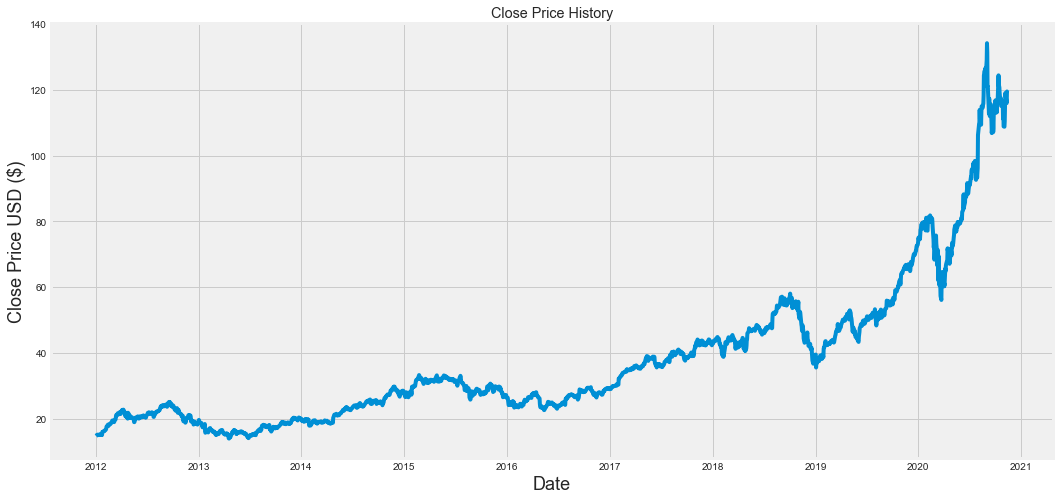

In [90]:
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

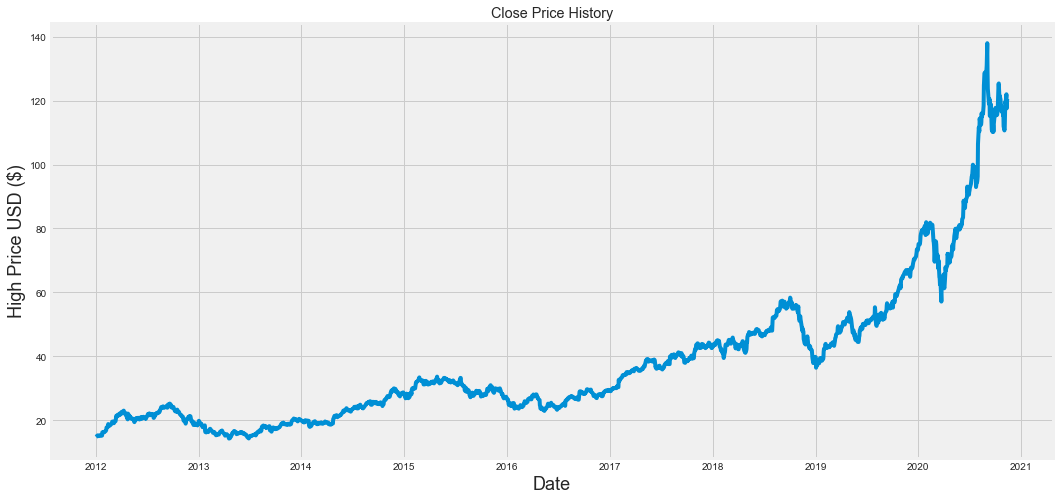

In [92]:
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['High'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('High Price USD ($)', fontsize=18)
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

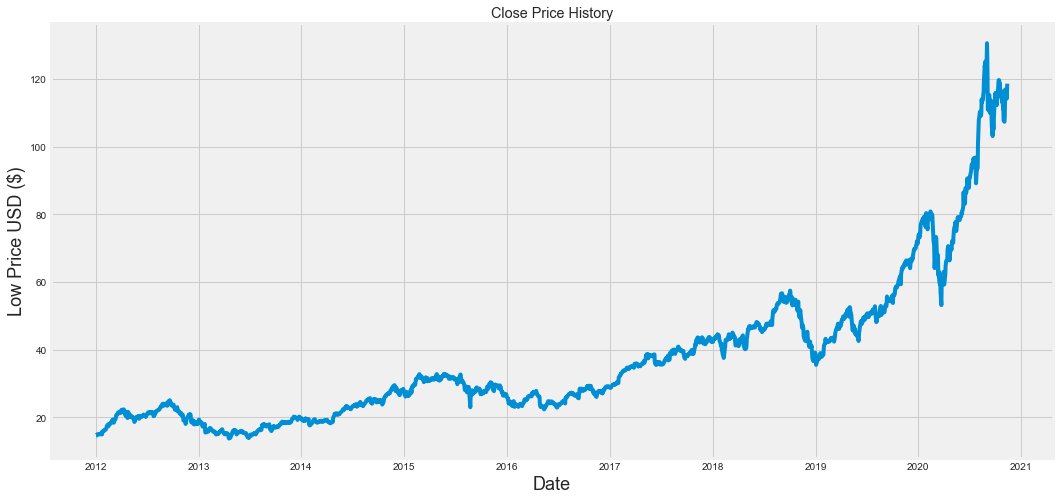

In [93]:
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Low'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Low Price USD ($)', fontsize=18)
plt.show()

In [106]:
data=df.filter(['Close'])
dataset=data.values

training_data_len=int(np.ceil(len(dataset)*.8))
training_data_len

1786

In [105]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
scaled_data=scaler.fit_transform(dataset)
scaled_data

array([[0.0061488 ],
       [0.00680527],
       [0.00816869],
       ...,
       [0.84854351],
       [0.87782009],
       [0.87549128]])

In [107]:
train_data=scaled_data[0:int(training_data_len),:]
x_train=[]
y_train=[]

for i in range(60,len(train_data)):
    x_train.append(train_data[i-60:i,0])
    y_train.append(train_data[i,0])

        

In [119]:
x_train,y_train=np.array(x_train),np.array(y_train)
x_train=np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))

In [120]:
x_train.shape

(1726, 60, 1)